In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

from experimentation.plotting import plot_distributions

In [2]:
impact = 0.04
base_rate = 1

sample_size = 1_000
variance = 1

experiments = 10_000

In [3]:
np.random.seed(171)
control = sp.stats.norm.rvs(
    base_rate, np.sqrt(variance), size=(sample_size, experiments)
)
treatment = sp.stats.norm.rvs(
    base_rate + impact, np.sqrt(variance), size=(sample_size, experiments)
)

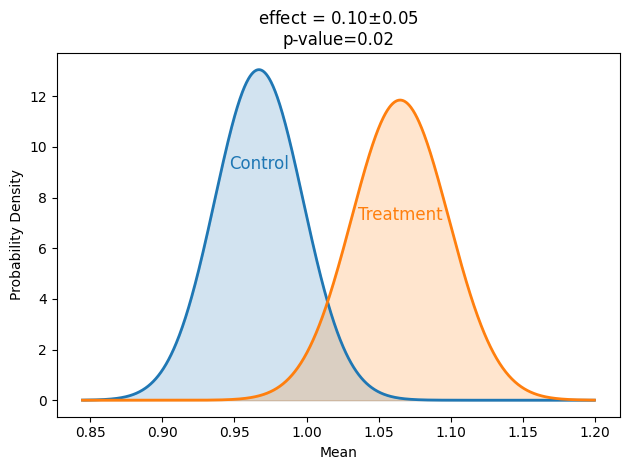

In [4]:
idx = 8
fig, ax = plot_distributions(control[:, idx], treatment[:, idx])

In [5]:
effect = treatment.mean(axis=0) - control.mean(axis=0)
std_effect = np.sqrt(sp.stats.sem(control) ** 2 + sp.stats.sem(treatment) ** 2)
z_score = effect / std_effect
pvalues = 1 - sp.stats.norm.cdf(z_score)

In [6]:
step = 0.0001
all_inflations = []
all_inflations_stderr = []
accepted = []

alphas = np.arange(step, 1, step)
for alpha in alphas:
    selected = pvalues < alpha
    inflation = np.mean(effect[selected]) / impact
    inflation_std = np.linalg.norm(std_effect[selected]) / sum(selected)
    all_inflations.append(inflation)
    all_inflations_stderr.append(inflation_std)
    accepted.append(sum(selected) / experiments)
all_inflations = np.array(all_inflations)
all_inflations_stderr = np.array(all_inflations_stderr)
accepted = np.array(accepted)

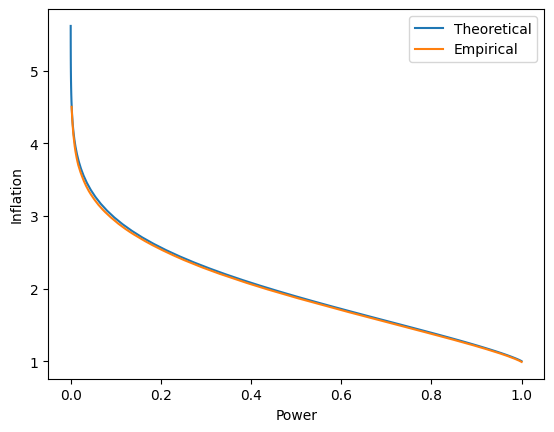

In [7]:
z = np.arange(-4, 4, 0.1)
power = sp.stats.norm.cdf(-z)
mean = (
    np.sqrt(2 * variance / (sample_size - 1)) * sp.stats.norm.pdf(z) / (power * impact)
    + 1
)

fig, ax = plt.subplots()
ax.plot(power, mean, label="Theoretical")
ax.plot(accepted, all_inflations, label="Empirical")
ax.set_xlabel("Power")
ax.set_ylabel("Inflation")
ax.legend();